# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è —Ä–∞–±–æ—Ç–∞ ‚Ññ 8

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö



In [53]:
!mkdir -p /content/drive/MyDrive/Kaggle

In [54]:
!pip install -q kaggle

from google.colab import drive
drive.mount('/content/drive')


!ls /content/drive/MyDrive/Kaggle/


!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


!mkdir -p /content/drive/MyDrive/Prepare_Data
%cd /content/drive/MyDrive/Prepare_Data


!kaggle datasets download andrewmvd/face-mask-detection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
kaggle.json
/content/drive/MyDrive/Prepare_Data
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection
License(s): CC0-1.0
face-mask-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
!unzip "/content/drive/MyDrive/Prepare_Data/face-mask-detection.zip" -d "/content/face-mask-detection/"

Archive:  /content/drive/MyDrive/Prepare_Data/face-mask-detection.zip
replace /content/face-mask-detection/annotations/maksssksksss0.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


## –û–±–∑–æ—Ä –¥–∞–Ω–Ω—ã—Ö

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

In [58]:
with open('/content/face-mask-detection/annotations/maksssksksss0.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

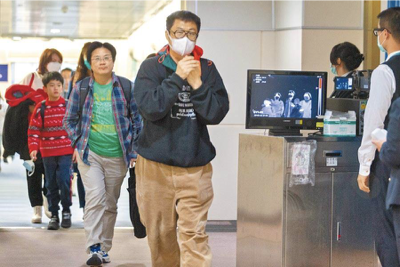

In [59]:
Image.open("/content/face-mask-detection/images/maksssksksss179.png")

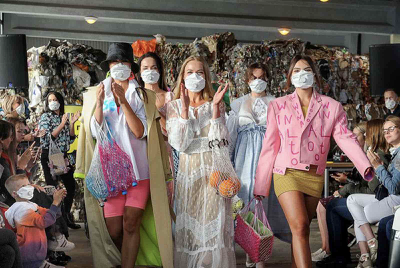

In [60]:
Image.open("/content/face-mask-detection/images/maksssksksss111.png")

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [61]:
def xml_to_yolo_bbox(bbox, w, h):

    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]

def yolo_to_xml_bbox(bbox, w, h):

    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2

    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)

    return [xmin, ymin, xmax, ymax]

classes = ["without_mask", "with_mask", "mask_weared_incorrect"]

input_dir = "/content/face-mask-detection/annotations"
output_dir = "/content/labels"
image_dir = "/content/face-mask-detection/images"


if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

import glob

files = glob.glob(os.path.join(input_dir, "*.xml"))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist!")
        continue

    result = []


    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall("object"):
        label = obj.find("name").text


        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)


        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:

        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding = "utf-8") as f:
            f.write("\n".join(result))

with open("/content/classes.txt", "w", encoding = "utf-8") as f:
    f.write(json.dumps(classes))

In [62]:
with open('/content/classes.txt') as f:
    contents = f.read()
    print(contents)

["without_mask", "with_mask", "mask_weared_incorrect"]


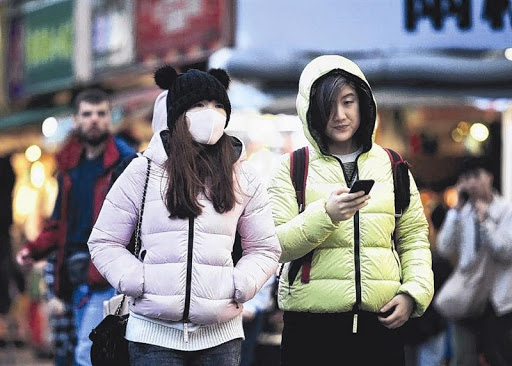

In [63]:
Image.open("/content/face-mask-detection/images/maksssksksss0.png")

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è YoloV8



In [64]:
if os.path.isfile("/content/data/"):
    print("There is folder!")


In [66]:
metarial = []

for i in os.listdir("/content/face-mask-detection/images"):
    srt = i[:-4]
    metarial.append(srt)

In [67]:

def preparinbdata(main_txt_file, main_img_file, train_size, test_size, val_size):

    for i in range(0,train_size):

        source_txt = main_txt_file + "/" + metarial[i] + ".txt"
        source_img = main_img_file + "/" + metarial[i] + ".png"

        mstring = metarial[i]
        train_destination_txt = "/content/data/train/labels" + "/" + metarial[i] + ".txt"
        train_destination_png = "/content/data/train/images" + "/" + metarial[i] + ".png"

        shutil.copy(source_txt, train_destination_txt)
        shutil.copy(source_img, train_destination_png)

        #metarial.remove(file_name[:-4])


    for l in range(train_size , train_size + test_size):

        source_txt = main_txt_file + "/" + metarial[l] + ".txt"
        source_img = main_img_file + "/" + metarial[l] + ".png"

        mstring = metarial[l]
        test_destination_txt = "/content/data/test/labels" + "/" + metarial[l] + ".txt"
        test_destination_png = "/content/data/test/images" + "/" + metarial[l] + ".png"

        shutil.copy(source_txt, test_destination_txt)
        shutil.copy(source_img, test_destination_png)

        #metarial.remove(file_name[:-4])


    for n in range(train_size + test_size , train_size + test_size + val_size):

        source_txt = main_txt_file + "/" + metarial[n] + ".txt"
        source_img = main_img_file + "/" + metarial[n] + ".png"

        mstring = metarial[n]
        val_destination_txt = "/content/data/val/labels" + "/" + metarial[n] + ".txt"
        val_destination_png = "/content/data/val/images" + "/" + metarial[n] + ".png"

        shutil.copy(source_txt, val_destination_txt)
        shutil.copy(source_img, val_destination_png)

        #metarial.remove(file_name[:-4])

In [68]:
preparinbdata("/content/labels", "/content/face-mask-detection/images", 603, 150, 100)

In [72]:
%cd /content/data

yaml_text = """train: /content/data/train/images
val: /content/data/val/images

nc: 3
names: ["without_mask", "with_mask", "mask_weared_incorrect"]"""

with open("/content/data/data.yaml", 'w') as file:
    file.write(yaml_text)

%cat data.yaml

/content/data
train: /content/data/train/images
val: /content/data/val/images

nc: 3
names: ["without_mask", "with_mask", "mask_weared_incorrect"]

## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ YoloV8



In [73]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.134 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 42.9/112.6 GB disk)


In [75]:
# /content/data
if os.path.isfile("/content/Result/"):
    print("Dosya mevcut! (There is folder!)")
else:
    os.mkdir("/content/Result/")

%cd /content/Result/


!yolo train model=yolov8n.pt data=/content/data/data.yaml epochs=50 imgsz=640

/content/Result
100% 6.25M/6.25M [00:00<00:00, 109MB/s]
Ultralytics 8.3.134 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

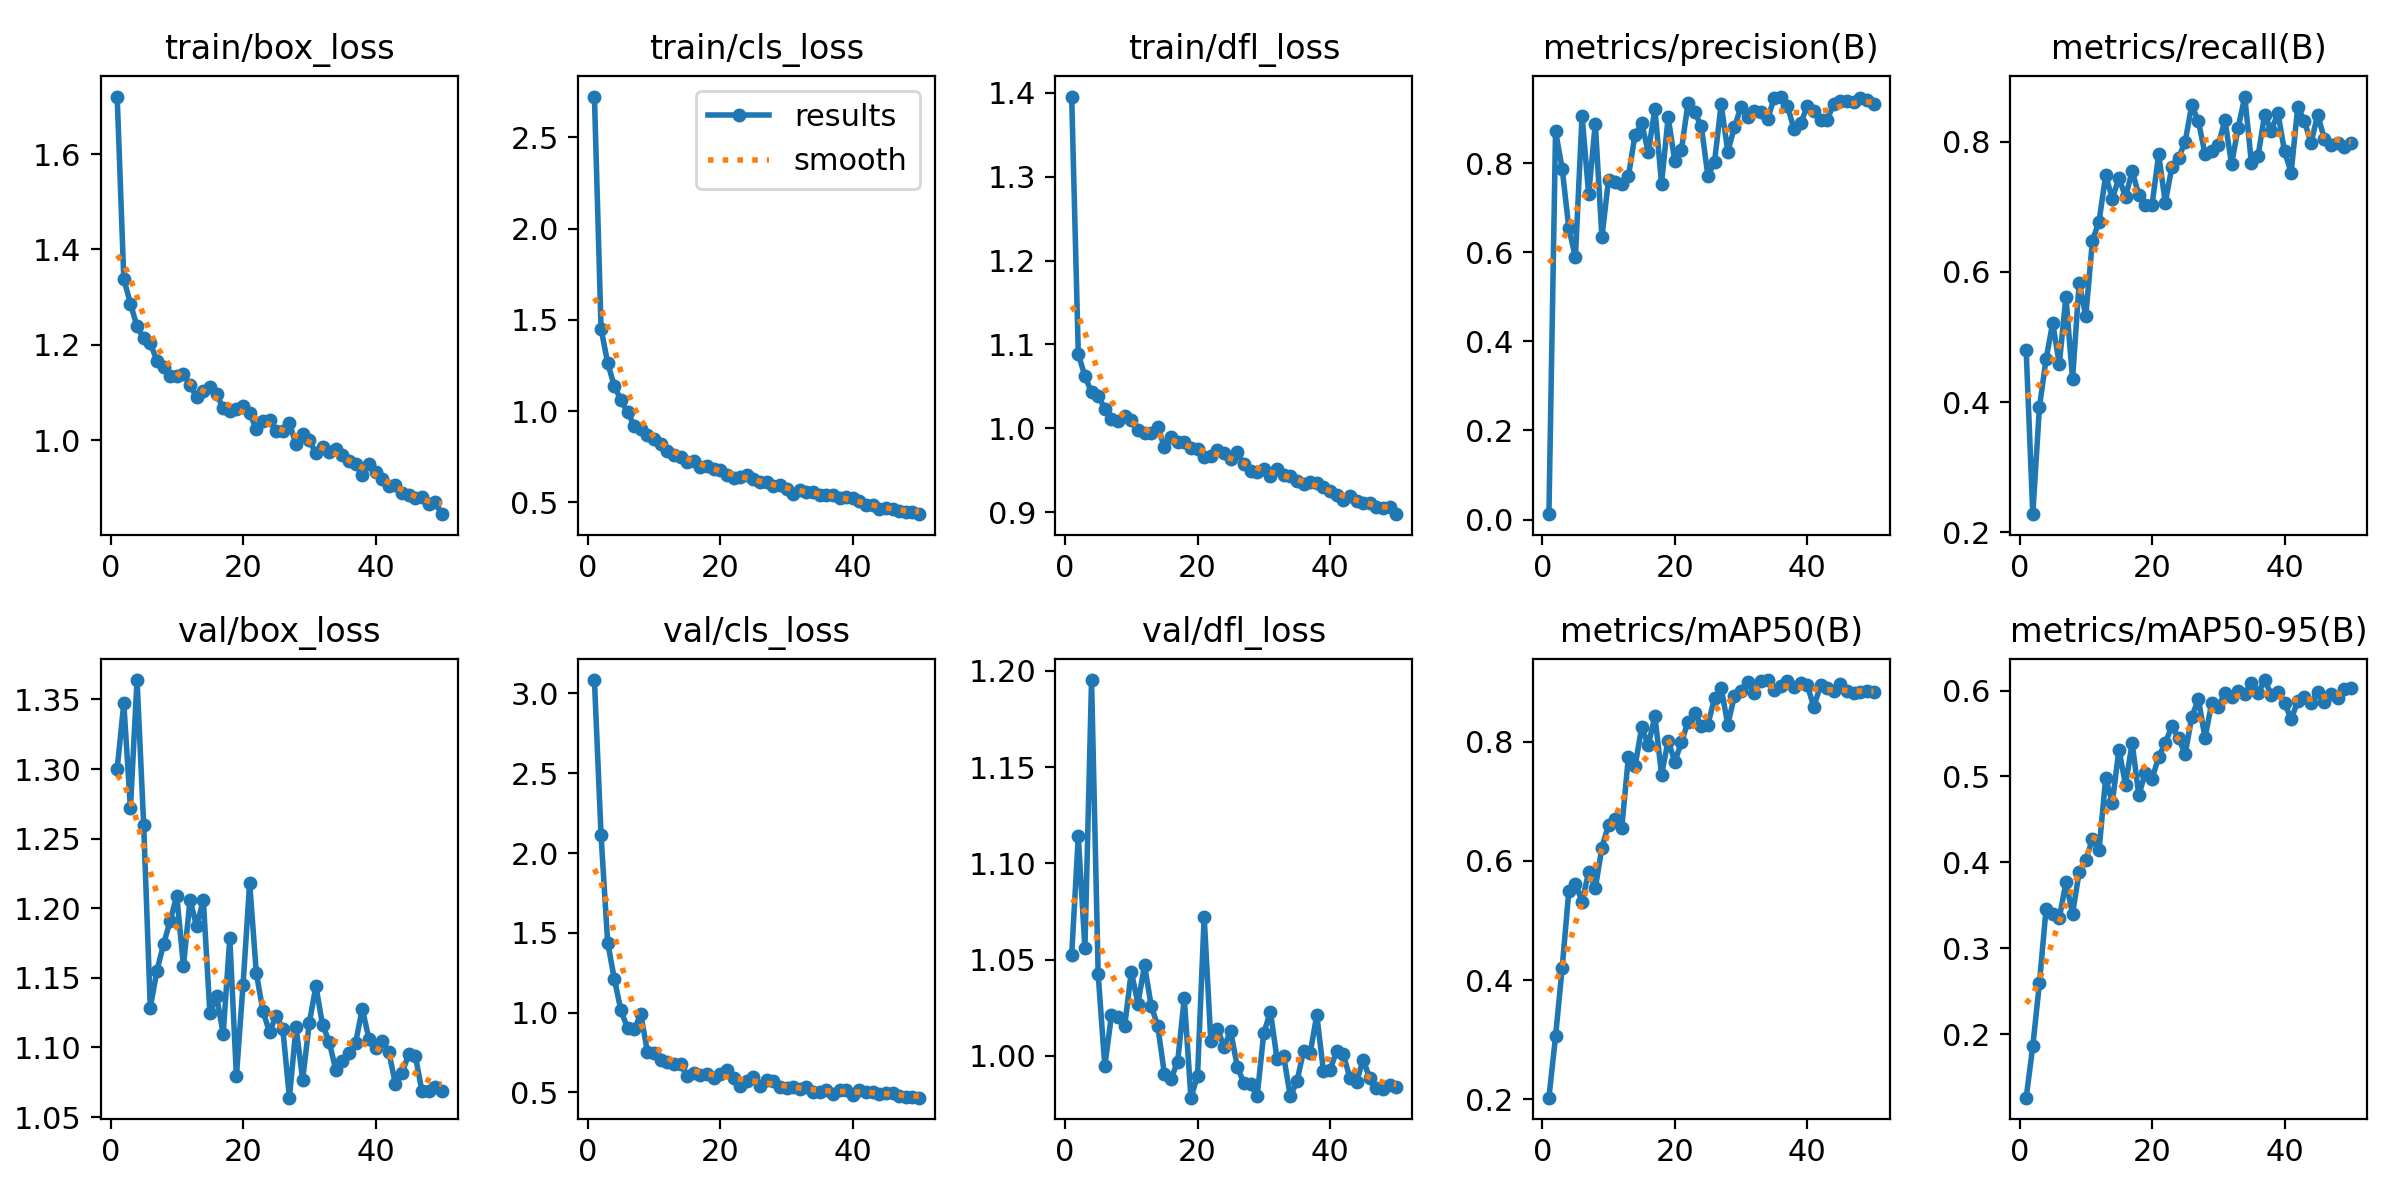

In [76]:
Image.open("/content/Result/runs/detect/train/results.png")

In [77]:
!yolo predict model=/content/Result/runs/detect/train/weights/best.pt source='/content/data/test/images'

Ultralytics 8.3.134 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/150 /content/data/test/images/maksssksksss105.png: 448x640 8 with_masks, 35.7ms
image 2/150 /content/data/test/images/maksssksksss124.png: 448x640 3 without_masks, 4 with_masks, 6.8ms
image 3/150 /content/data/test/images/maksssksksss127.png: 640x448 1 with_mask, 33.3ms
image 4/150 /content/data/test/images/maksssksksss13.png: 384x640 6 with_masks, 1 mask_weared_incorrect, 42.4ms
image 5/150 /content/data/test/images/maksssksksss137.png: 640x640 4 without_masks, 3 with_masks, 12.8ms
image 6/150 /content/data/test/images/maksssksksss148.png: 608x640 3 without_masks, 2 with_masks, 37.4ms
image 7/150 /content/data/test/images/maksssksksss150.png: 640x512 1 with_mask, 34.8ms
image 8/150 /content/data/test/images/maksssksksss152.png: 480x640 7 with_masks, 34.2ms
image 9/150 /content/data/test/images/maksssksksss154.png

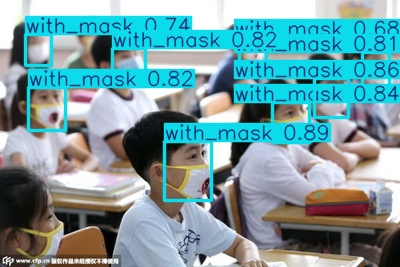

In [80]:
Image.open('/content/Result/runs/detect/predict/maksssksksss105.jpg')

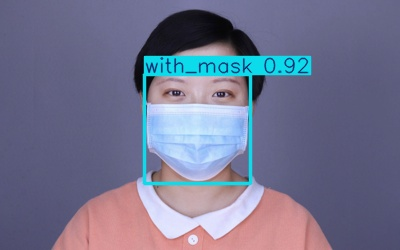

In [81]:
Image.open('/content/Result/runs/detect/predict/maksssksksss600.jpg')

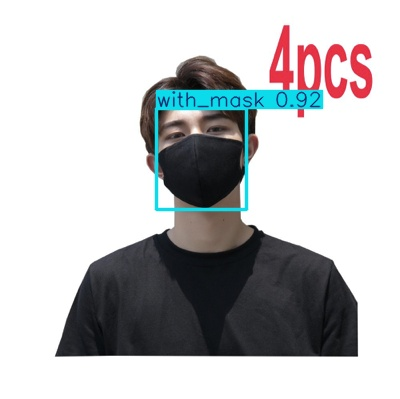

In [82]:
Image.open('/content/Result/runs/detect/predict/maksssksksss617.jpg')

## –£–ª—É—á—à–µ–Ω–Ω—ã–π –±–µ–π–∑–ª–∞–π–Ω


In [84]:
import os
from pathlib import Path
from datetime import datetime


CONFIG = {
    "base_dir": "/content",
    "data_config": "data/data.yaml",
    "model_name": "yolov8n.pt",
    "training_params": {
        "epochs": 50,
        "imgsz": 640,
        "batch": 16
    },
    "output_folders": {
        "results": "Training_Results",
        "weights": "model_weights",
        "plots": "training_plots"
    }
}

def create_directory_structure(base_path: str, folders: dict) -> bool:
    """–°–æ–∑–¥–∞–µ—Ç —Å—Ç—Ä—É–∫—Ç—É—Ä—É –ø–∞–ø–æ–∫ –¥–ª—è —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞"""
    try:

        Path(base_path).mkdir(parents=True, exist_ok=True)


        for folder_name in folders.values():
            (Path(base_path) / folder_name).mkdir(exist_ok=True)

        print(f"–°—Ç—Ä—É–∫—Ç—É—Ä–∞ –ø–∞–ø–æ–∫ —Å–æ–∑–¥–∞–Ω–∞ –≤: {base_path}")
        return True
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –ø–∞–ø–æ–∫: {str(e)}")
        return False

def train_yolo():
    """–ó–∞–ø—É—Å–∫–∞–µ—Ç –æ–±—É—á–µ–Ω–∏–µ YOLO –º–æ–¥–µ–ª–∏ —Å –Ω–æ–≤–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π –ø–∞–ø–æ–∫"""
    try:

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        experiment_name = f"exp_{timestamp}"
        experiment_dir = Path(CONFIG["base_dir"]) / experiment_name


        if not create_directory_structure(experiment_dir, CONFIG["output_folders"]):
            raise RuntimeError("–ù–µ —É–¥–∞–ª–æ—Å—å —Å–æ–∑–¥–∞—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—É –ø–∞–ø–æ–∫")


        results_dir = experiment_dir / CONFIG["output_folders"]["results"]
        weights_dir = experiment_dir / CONFIG["output_folders"]["weights"]
        plots_dir = experiment_dir / CONFIG["output_folders"]["plots"]


        os.chdir(results_dir)
        print(f"–¢–µ–∫—É—â–∞—è —Ä–∞–±–æ—á–∞—è –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è: {os.getcwd()}")


        train_cmd = (
            f"yolo train model={CONFIG['model_name']} "
            f"data={Path(CONFIG['base_dir']) / CONFIG['data_config']} "
            f"epochs={CONFIG['training_params']['epochs']} "
            f"imgsz={CONFIG['training_params']['imgsz']} "
            f"batch={CONFIG['training_params']['batch']} "
            f"project={experiment_dir} "
            f"name={results_dir.name}"
        )

        print(f"–ó–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:\n{train_cmd}")
        !{train_cmd}


        print("–û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ!")
        print(f"–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: {experiment_dir}")

    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è: {str(e)}")
        raise

if __name__ == "__main__":
    train_yolo()

–°—Ç—Ä—É–∫—Ç—É—Ä–∞ –ø–∞–ø–æ–∫ —Å–æ–∑–¥–∞–Ω–∞ –≤: /content/exp_20250514_193317
–¢–µ–∫—É—â–∞—è —Ä–∞–±–æ—á–∞—è –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è: /content/exp_20250514_193317/Training_Results
–ó–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:
yolo train model=yolov8n.pt data=/content/data/data.yaml epochs=50 imgsz=640 batch=16 project=/content/exp_20250514_193317 name=Training_Results
100% 6.25M/6.25M [00:00<00:00, 122MB/s]
Ultralytics 8.3.134 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, fre